 #  ASSIGNMENT-2 CS 203

Yug Mitulkumar Desai- 23110370     
Zainab Kapadia- 23110373

Team no- 34

# Dataset Preparation

In [ ]:
!curl -O https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  31.7M      0  0:00:13  0:00:13 --:--:-- 34.3M


In [ ]:
!unzip 202412-citibike-tripdata.zip -d extracted_data

Archive:  202412-citibike-tripdata.zip
 extracting: extracted_data/202412-citibike-tripdata_1.csv  
 extracting: extracted_data/202412-citibike-tripdata_3.csv  
 extracting: extracted_data/202412-citibike-tripdata_2.csv  


In [ ]:
import os
import json
import pandas as pd

folder = "extracted_data"
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

# Specifying dtype when loading data in order to avoid inferring incorrect dtype automatically

dfs = {file: pd.read_csv(os.path.join(folder,file)) for file in files}

for file,df in dfs.items():
  print(f"Starting 5 rows of {file}:")
  print("\n")
  print(df.head().to_markdown())
  print("\n")


<ipython-input-4-2c7c9c1043d9>:10: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {file: pd.read_csv(os.path.join(folder,file)) for file in files}
<ipython-input-4-2c7c9c1043d9>:10: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {file: pd.read_csv(os.path.join(folder,file)) for file in files}


Starting 5 rows of 202412-citibike-tripdata_3.csv:


|    | ride_id          | rideable_type   | started_at              | ended_at                | start_station_name       |   start_station_id | end_station_name            |   end_station_id |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |
|---:|:-----------------|:----------------|:------------------------|:------------------------|:-------------------------|-------------------:|:----------------------------|-----------------:|------------:|------------:|----------:|----------:|:----------------|
|  0 | 8AB4549FAB5DE6AC | electric_bike   | 2024-12-16 14:23:24.629 | 2024-12-16 14:35:57.148 | 2 Ave & E 72 St          |            6925.09 | 2 Ave & E 72 St             |          6925.09 |     40.7688 |    -73.9584 |   40.7688 |  -73.9584 | member          |
|  1 | F59B73C50E8B58B6 | classic_bike    | 2024-12-27 10:06:22.659 | 2024-12-27 10:23:39.186 | E 81 St & York Ave       |            7084.12 | Broadway & W 5

In [ ]:
# Concatenating all CSV files
dfs = [pd.read_csv(os.path.join(folder,f)) for f in files]
df = pd.concat(dfs, ignore_index=True)

# Displaying the first 5 rows
df.head()

<ipython-input-5-a6e3073b40ad>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(os.path.join(folder,f)) for f in files]
<ipython-input-5-a6e3073b40ad>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(os.path.join(folder,f)) for f in files]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8AB4549FAB5DE6AC,electric_bike,2024-12-16 14:23:24.629,2024-12-16 14:35:57.148,2 Ave & E 72 St,6925.09,2 Ave & E 72 St,6925.09,40.768762,-73.958408,40.768762,-73.958408,member
1,F59B73C50E8B58B6,classic_bike,2024-12-27 10:06:22.659,2024-12-27 10:23:39.186,E 81 St & York Ave,7084.12,Broadway & W 58 St,6948.10,40.772838,-73.949892,40.766953,-73.981693,member
2,A17B374F1D629E4B,electric_bike,2024-12-21 00:55:15.551,2024-12-21 00:58:57.394,Carlton Ave & Greene Ave,4386.07,Lexington Ave & Classon Ave,4452.03,40.685957,-73.971468,40.686768,-73.959282,member
3,606F367F564A5BD5,classic_bike,2024-12-31 16:49:02.293,2024-12-31 16:55:29.551,2 Ave & E 72 St,6925.09,E 81 St & York Ave,7084.12,40.768762,-73.958408,40.772838,-73.949892,member
4,30D5A941C83E7E54,electric_bike,2024-12-17 14:40:34.610,2024-12-17 14:55:27.281,Broadway & W 58 St,6948.10,E 81 St & York Ave,7084.12,40.766953,-73.981693,40.772838,-73.949892,member


# PANDERA VALIDATION RULES

A)DataType validation for each column:-

In [ ]:
!pip install pandera -q
import pandera as pa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 11.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
schema_field_dtypes= pa.DataFrameSchema(
    {
    "ride_id": pa.Column(str),
    "rideable_type": pa.Column(str),
    "started_at": pa.Column(str),
    "ended_at": pa.Column(str),
    "start_station_name": pa.Column(str, nullable=True),
    "start_station_id": pa.Column(str),
    "end_station_name": pa.Column(str),
    "end_station_id": pa.Column(str),
    "start_lat": pa.Column(float),
    "start_lng": pa.Column(float),
    "end_lat": pa.Column(float),
    "end_lng": pa.Column(float),
    "member_casual": pa.Column(str)
    },
    index = pa.Index(int),
    strict=True)

try:
    schema_field_dtypes.validate(df, lazy=True)
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))


{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "start_station_id",
        "check": "not_nullable",
        "error": "non-nullable series 'start_station_id' contains null values:4900       NaN7560       NaN7774       NaN22642      NaN24038      NaN          ... 2306207    NaN2310787    NaN2310812    NaN2310839    NaN2310859    NaNName: start_station_id, Length: 1120, dtype: object"
      },
      {
        "schema": null,
        "column": "end_station_name",
        "check": "not_nullable",
        "error": "non-nullable series 'end_station_name' contains null values:550890     NaN550891     NaN550894     NaN550895     NaN550901     NaN          ... 1737585    NaN1737589    NaN1737592    NaN1737593    NaN1737595    NaNName: end_station_name, Length: 6125, dtype: object"
      },
      {
        "schema": null,
        "column": "end_station_id",
        "check": "not_nullable",
        "error": "non-nullable series 'end_station_id' con

B) Features in the citibike tripdata:-

a) ride_id

In [ ]:
# Checking the content of ride_id column in the datsets

print(f"ride_id column values:- \n")
print(df.ride_id)

ride_id column values:- 

0          8AB4549FAB5DE6AC
1          F59B73C50E8B58B6
2          A17B374F1D629E4B
3          606F367F564A5BD5
4          30D5A941C83E7E54
                 ...       
2311166    4D7A0F3A9B538327
2311167    93C022D486F87ABC
2311168    20A11C486859F19B
2311169    4D27B49621858BF9
2311170    AA99DCFF9F464CC0
Name: ride_id, Length: 2311171, dtype: object


From the output, it is clearly visible that the column values consists of string type data( which is stored as an object in pandas) consisting of alphanumeric characters.

In [ ]:
# Validation specific to ride_id

ride_id_dtype =pa.DataFrameSchema(
    {
        "ride_id": pa.Column(
            str,
            checks=pa.Check.str_length(16))
    }
)

try:
    ride_id_dtype.validate(df, lazy=True)
    print("Validation successful for ride_id_dtype!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful for ride_id_dtype!


b)rideable_type

In [ ]:
# Checking the content of rideable_type column in the datsets

print(f"rideable_type column values:- \n")
print(df.rideable_type)
print(df.rideable_type.unique())
print("\n")

rideable_type column values:- 

0          electric_bike
1           classic_bike
2          electric_bike
3           classic_bike
4          electric_bike
               ...      
2311166     classic_bike
2311167     classic_bike
2311168    electric_bike
2311169    electric_bike
2311170    electric_bike
Name: rideable_type, Length: 2311171, dtype: object
['electric_bike' 'classic_bike']




From the output, it is clearly visible that the rideable_type column which has a datatype of category in all three datasets contains only two distinct categories which are classic_bike and electric_bike.

In [ ]:
# Validation specific to rideable_type:

rideable_type_dtype =pa.DataFrameSchema(
    {
        "rideable_type": pa.Column(
            str,
            checks= pa.Check.isin(["electric_bike","classic_bike"]),
            nullable=False
            )
    }
)

try:
    rideable_type_dtype.validate(df, lazy=True)
    print("Validation successful of rideable_type_dtype !")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful of rideable_type_dtype !


c) started_at

In [ ]:
# Checking the content of started_at column in the datsets

print(f"started_at column values:- \n")
print(df.started_at)
print("\n")

started_at column values:- 

0          2024-12-16 14:23:24.629
1          2024-12-27 10:06:22.659
2          2024-12-21 00:55:15.551
3          2024-12-31 16:49:02.293
4          2024-12-17 14:40:34.610
                    ...           
2311166    2024-12-06 18:43:51.866
2311167    2024-12-10 10:34:58.071
2311168    2024-12-03 14:02:29.375
2311169    2024-12-05 07:03:08.210
2311170    2024-12-09 08:33:59.397
Name: started_at, Length: 2311171, dtype: object




From the output, it is clearly visible that the started_at column has a datatype of string which is considered an object(in pandera) in all three datasets. An appropriate check for this column would be that the string should match the datetime format.

In [ ]:
# Validation specific to started_at:

started_at_dtype =pa.DataFrameSchema(
    {
        "started_at": pa.Column(
            str,
            checks=pa.Check.str_matches(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')
            )
    }
)

try:
    started_at_dtype.validate(df, lazy=True)
    print("Validation successful of started_at_dtype !")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))


Validation successful of started_at_dtype !


d) ended_at

In [ ]:
# Checking the content of ended_at column in the datsets

print(f"ended_at column values:- \n")
print(df.ended_at)
print("\n")

ended_at column values:- 

0          2024-12-16 14:35:57.148
1          2024-12-27 10:23:39.186
2          2024-12-21 00:58:57.394
3          2024-12-31 16:55:29.551
4          2024-12-17 14:55:27.281
                    ...           
2311166    2024-12-06 18:50:29.033
2311167    2024-12-10 10:51:49.151
2311168    2024-12-03 14:07:51.452
2311169    2024-12-05 07:06:03.572
2311170    2024-12-09 08:46:22.344
Name: ended_at, Length: 2311171, dtype: object




/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


From the output, it is clearly visible that the ended_at column has a datatype of string which is considered an object(in pandera) in all three datasets. An appropriate check for this column would be that the string should match the datetime format.

In [ ]:
# Validation specific to ended_at:

ended_at_dtype =pa.DataFrameSchema(
    {
        "started_at": pa.Column(
            str,
            checks=pa.Check.str_matches(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')
            )
    }
)

try:
    ended_at_dtype.validate(df, lazy=True)
    print("Validation successful of ended_at_dtype !")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful of ended_at_dtype !


e)start_station_name

In [ ]:
# Checking the content of start_station_name column in the datsets

print(f"start_station_name column values:- \n")
print(df.start_station_name)
print("\n")

start_station_name column values:- 

0                    2 Ave & E 72 St
1                 E 81 St & York Ave
2           Carlton Ave & Greene Ave
3                    2 Ave & E 72 St
4                 Broadway & W 58 St
                     ...            
2311166              5 Ave & E 30 St
2311167      Lafayette St & Grand St
2311168         Lenox Ave & W 117 St
2311169      Watts St & Greenwich St
2311170    Washington Ave & E 174 St
Name: start_station_name, Length: 2311171, dtype: object




/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Upon analyzing the start_station_name field, it can be noticed that it is expected to be a non-empty string with a minimum length of 1 character. This check guarantees that every ride has a valid start station name, ensuring that no ride has missing or incomplete location information.

In [ ]:
# Validation for start_station_name
start_station_name_dtype = pa.DataFrameSchema({
    "start_station_name": pa.Column(str,
                                    nullable=True,
                                    checks=[pa.Check.str_length(min_value=1)])  # Allow null and Non-empty strings
})

try:
    start_station_name_dtype.validate(df, lazy=True)
    print("Validation successful for start_station_name!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful for start_station_name!


f) start_station_id

In [ ]:
# Checking the content of start_station_id column in the datsets

print(f"start_station_id column values:- \n")
print(df.start_station_id)
print("\n")

start_station_id column values:- 

0          6925.09
1          7084.12
2          4386.07
3          6925.09
4          6948.10
            ...   
2311166    6248.08
2311167    5422.09
2311168    7655.22
2311169    5578.02
2311170    8277.03
Name: start_station_id, Length: 2311171, dtype: object




The start_station_id field, which is a string, is validated to be of length 6 or 7 characters so that the stations can be identified consistently.

In [ ]:
# Validation for start_station_id
start_station_id_dtype = pa.DataFrameSchema({
    "start_station_id": pa.Column(str,
                                  checks=[pa.Check.str_length(min_value=1)]) # String should be Non-empty
})

try:
    start_station_id_dtype.validate(df, lazy=True)
    print("Validation successful for start_station_id!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "start_station_id",
        "check": "not_nullable",
        "error": "non-nullable series 'start_station_id' contains null values:4900       NaN7560       NaN7774       NaN22642      NaN24038      NaN          ... 2306207    NaN2310787    NaN2310812    NaN2310839    NaN2310859    NaNName: start_station_id, Length: 1120, dtype: object"
      }
    ],
    "WRONG_DATATYPE": [
      {
        "schema": null,
        "column": "start_station_id",
        "check": "dtype('str')",
        "error": "expected series 'start_station_id' to have type str:failure cases:         index failure_case0      1294211      6492.081      1294212      5616.082      1294213      6492.083      1294214      6140.054      1294215      6140.05...        ...          ...33896  2311166      6248.0833897  2311167      5422.0933898  2311168      7655.2233899  2311169      5578.0233900  2311170      8277.03[33901 rows x 2

g)end_station_name

In [ ]:
# Checking the content of end_station_name column in the datsets

print(f"end_station_name column values:- \n")
print(df.end_station_name)
print("\n")

end_station_name column values:- 

0                      2 Ave & E 72 St
1                   Broadway & W 58 St
2          Lexington Ave & Classon Ave
3                   E 81 St & York Ave
4                   E 81 St & York Ave
                      ...             
2311166               10 Ave & W 28 St
2311167               10 Ave & W 28 St
2311168       W 110 St & Amsterdam Ave
2311169          West St & Chambers St
2311170      Courtlandt Ave & E 149 St
Name: end_station_name, Length: 2311171, dtype: object




Similar to the start_station_name, the end_station_name field is validated to ensure that it is not empty and has a minimum length of 1 character. This check is critical for ensuring that each ride has a valid end station name

In [ ]:
# Validation for end_station_name
end_station_name_dtype = pa.DataFrameSchema({
    "end_station_name": pa.Column(str,
                                  nullable=True,
                                  checks=[pa.Check.str_length(min_value=1)])  # allow null and non-empty strings
})

try:
    end_station_name_dtype.validate(df, lazy=True)
    print("Validation successful for end_station_name!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "end_station_name",
        "check": "not_nullable",
        "error": "non-nullable series 'end_station_name' contains null values:550890     NaN550891     NaN550894     NaN550895     NaN550901     NaN          ... 1737585    NaN1737589    NaN1737592    NaN1737593    NaN1737595    NaNName: end_station_name, Length: 6125, dtype: object"
      }
    ]
  }
}


h) end_station_id

In [ ]:
# Checking the content of end_station_id column in the datsets

print(f"end_station_id column values:- \n")
print(df.end_station_id)
print("\n")

end_station_id column values:- 

0          6925.09
1          6948.10
2          4452.03
3          7084.12
4          7084.12
            ...   
2311166    6459.04
2311167    6459.04
2311168    7646.04
2311169    5329.03
2311170    7840.05
Name: end_station_id, Length: 2311171, dtype: object




The end_station_id field is also validated to ensure that it has a length of either 6 or 7 characters, similar to start_station_id.

In [ ]:
# Validation for end_station_id
end_station_id_dtype = pa.DataFrameSchema({
    "end_station_id": pa.Column(str,
                                checks=[pa.Check.str_length(min_value=1)])  # String should be non-empty
})

try:
    end_station_id_dtype.validate(df, lazy=True)
    print("Validation successful for end_station_id!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "end_station_id",
        "check": "not_nullable",
        "error": "non-nullable series 'end_station_id' contains null values:473        NaN1514       NaN5125       NaN8190       NaN12504      NaN          ... 2302533    NaN2302900    NaN2303865    NaN2303901    NaN2310464    NaNName: end_station_id, Length: 7485, dtype: object"
      }
    ],
    "WRONG_DATATYPE": [
      {
        "schema": null,
        "column": "end_station_id",
        "check": "dtype('str')",
        "error": "expected series 'end_station_id' to have type str:failure cases:          index failure_case0       1032067      5955.121       1032068      6115.062       1032069      5382.063       1032070      7774.024       1032071      7727.07...         ...          ...227872  2311166      6459.04227873  2311167      6459.04227874  2311168      7646.04227875  2311169      5329.03227876  2311170      7840.05[227877 rows 

i) start_lat, start_lng

In [ ]:
# Checking the content of start_alt and start_lng column in the datsets

print(f"start_lat column values:- \n")
print(df.start_lat)
print("\n")

print(f"start_lng column values:- \n")
print(df.start_lng)
print("\n")

start_lat column values:- 

0          40.768762
1          40.772838
2          40.685957
3          40.768762
4          40.766953
             ...    
2311166    40.745985
2311167    40.720280
2311168    40.802557
2311169    40.724055
2311170    40.843079
Name: start_lat, Length: 2311171, dtype: float64


start_lng column values:- 

0         -73.958408
1         -73.949892
2         -73.971468
3         -73.958408
4         -73.981693
             ...    
2311166   -73.986295
2311167   -73.998790
2311168   -73.949078
2311169   -74.009660
2311170   -73.900216
Name: start_lng, Length: 2311171, dtype: float64




/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


By analyzing the start_lat and start_lng field, it can be observed that it is a float and must fall within the valid latitude range of -90 to 90 and -180 to 180 respectively. This check ensures that the geographic coordinates for the starting location are valid.

In [ ]:
# Validation for start_lat
start_lat_dtype = pa.DataFrameSchema({
    "start_lat": pa.Column(float,
                           checks=[pa.Check.ge(-90), pa.Check.le(90)])  # Latitude range -90 to 90
})

try:
    start_lat_dtype.validate(df, lazy=True)
    print("Validation successful for start_lat!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

# Validation for start_lng
start_lng_dtype = pa.DataFrameSchema({
    "start_lng": pa.Column(float,
                           checks=[pa.Check.ge(-180), pa.Check.le(180)])  # Longitude range -180 to 180
})

try:
    start_lng_dtype.validate(df, lazy=True)
    print("Validation successful for start_lng!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful for start_lat!
Validation successful for start_lng!


j) end_lat, end_lng

In [ ]:
# Checking the content of end_alt and end_lng column in the datsets

print(f"end_lat column values:- \n")
print(df.end_lat)
print("\n")

print(f"end_lng column values:- \n")
print(df.end_lng)
print("\n")

end_lat column values:- 

0          40.768762
1          40.766953
2          40.686768
3          40.772838
4          40.772838
             ...    
2311166    40.750664
2311167    40.750664
2311168    40.802692
2311169    40.717548
2311170    40.816402
Name: end_lat, Length: 2311171, dtype: float64


end_lng column values:- 

0         -73.958408
1         -73.981693
2         -73.959282
3         -73.949892
4         -73.949892
             ...    
2311166   -74.001768
2311167   -74.001768
2311168   -73.962950
2311169   -74.013221
2311170   -73.919549
Name: end_lng, Length: 2311171, dtype: float64




The end_lat and end_lng fields, which represents the latitude and longitude of the end locations are validated in the same way as the start_lat and start_lng.

In [ ]:
# Validation for end_lat
end_lat_dtype = pa.DataFrameSchema({
    "end_lat": pa.Column(float,
                         checks=[pa.Check.ge(-90), pa.Check.le(90)])  # Latitude range -90 to 90
})

try:
    end_lat_dtype.validate(df, lazy=True)
    print("Validation successful for end_lat!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

# Validation for end_lng
end_lng_dtype = pa.DataFrameSchema({
    "end_lng": pa.Column(float,
                         checks=[pa.Check.ge(-180), pa.Check.le(180)])  # Longitude range -180 to 180
})

try:
    end_lng_dtype.validate(df, lazy=True)
    print("Validation successful for end_lng!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "end_lat",
        "check": "not_nullable",
        "error": "non-nullable series 'end_lat' contains null values:551000    NaN551189    NaN551239    NaN552386    NaN552426    NaN           ..1737442   NaN1737472   NaN1737503   NaN1737531   NaN1737564   NaNName: end_lat, Length: 376, dtype: float64"
      }
    ]
  }
}
{
  "SCHEMA": {
    "SERIES_CONTAINS_NULLS": [
      {
        "schema": null,
        "column": "end_lng",
        "check": "not_nullable",
        "error": "non-nullable series 'end_lng' contains null values:551000    NaN551189    NaN551239    NaN552386    NaN552426    NaN           ..1737442   NaN1737472   NaN1737503   NaN1737531   NaN1737564   NaNName: end_lng, Length: 376, dtype: float64"
      }
    ]
  }
}


k) member_casual

In [ ]:
# Checking the content of member_casual column in the datsets

print(f"member_casual column values:- \n")
print(df.member_casual)
print("\n")

member_casual column values:- 

0          member
1          member
2          member
3          member
4          member
            ...  
2311166    member
2311167    member
2311168    member
2311169    casual
2311170    member
Name: member_casual, Length: 2311171, dtype: object




The member_casual field is a string that is restricted to two possible values: "member" or "casual". This check ensures that the dataset consistently distinguishes between different rider types.

In [ ]:
# Validation for member_casual
member_casual_dtype = pa.DataFrameSchema({
    "member_casual": pa.Column(str,
                               checks=pa.Check.isin(['member', 'casual']))  # Only "member" or "casual" entries are allowed
})

try:
    member_casual_dtype.validate(df, lazy=True)
    print("Validation successful for member_casual!")
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))

Validation successful for member_casual!


C) Data validation rules to verify that a ride's end time occurs after its start time using Pandera's decorator functionality.

In [ ]:
ride_schema = pa.DataFrameSchema({
    "started_at": pa.Column(str),
    "ended_at": pa.Column(str)
})

@pa.check_input(ride_schema)
def verify_end_time_after_start_time(df):
    """Checks if 'ended_at' is after 'started_at'"""

    # Converting both series to datetime objects
    start = pd.to_datetime(df["started_at"])
    end = pd.to_datetime(df["ended_at"])

    if not (end > start).all():
        raise pa.errors.SchemaError("Start time must be before end time.")
    return df

try:
    result_df = verify_end_time_after_start_time(df)
    print("Validation passed successfully!")
except Exception as e:
    print(f"Validation failed: {e}")

Validation passed successfully!


# Great Expectations Suite

In [ ]:
!pip install great_expectations -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 15.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [ ]:
# importing the necessary libraries

import great_expectations as gx
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.checkpoint import CheckpointResult
from great_expectations.checkpoint import Checkpoint
import pandas as pd

In [ ]:
# Creating a Data Context
context = gx.get_context(mode="file")

# Setting up the Data Source
data_source_name = "citibike_dsrc"
data_source = context.data_sources.add_pandas(name=data_source_name)

# Setting up Data Assets for combined DataFrame
data_asset_name = "citibike_dataasset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name)
print("Added Data asset")

# Creating and fetching a Batch for the combined DataFrame
batch_definition = data_asset.add_batch_definition_whole_dataframe("batch_definition")
batch_parameters = {"dataframe": df}
batch = batch_definition.get_batch(batch_parameters)

# Display the first few rows of the batch
print(f"Batch created for {data_asset_name}:")
print(batch.head(5))

Added Data asset
Batch created for citibike_dataasset:


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

            ride_id  rideable_type               started_at  \
0  8AB4549FAB5DE6AC  electric_bike  2024-12-16 14:23:24.629   
1  F59B73C50E8B58B6   classic_bike  2024-12-27 10:06:22.659   
2  A17B374F1D629E4B  electric_bike  2024-12-21 00:55:15.551   
3  606F367F564A5BD5   classic_bike  2024-12-31 16:49:02.293   
4  30D5A941C83E7E54  electric_bike  2024-12-17 14:40:34.610   

                  ended_at        start_station_name start_station_id  \
0  2024-12-16 14:35:57.148           2 Ave & E 72 St          6925.09   
1  2024-12-27 10:23:39.186        E 81 St & York Ave          7084.12   
2  2024-12-21 00:58:57.394  Carlton Ave & Greene Ave          4386.07   
3  2024-12-31 16:55:29.551           2 Ave & E 72 St          6925.09   
4  2024-12-17 14:55:27.281        Broadway & W 58 St          6948.10   

              end_station_name end_station_id  start_lat  start_lng  \
0              2 Ave & E 72 St        6925.09  40.768762 -73.958408   
1           Broadway & W 58 St        69

a) Validate the datatype of each column by creating an expectation suite.

In [ ]:
#Creating an Expectation suite
suite__name = "citibike_suite"
suite_ = gx.ExpectationSuite(suite__name)

In [ ]:
suite_ = context.suites.add(suite_)

In [ ]:
#Adding Expectations for DataType Validation
from great_expectations.expectations.core import ExpectColumnValuesToBeOfType

expectations = [
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "ride_id", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "rideable_type", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "started_at", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "ended_at", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "start_station_name", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "start_station_id", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "end_station_name", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "end_station_id", "type_": "str"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "start_lat", "type_": "float"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "start_lng", "type_": "float"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "end_lat", "type_": "float"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "end_lng", "type_": "float"}},
    {"expectation_type": "expect_column_values_to_be_of_type", "kwargs": {"column": "member_casual", "type_": "str"}}
]

# Converting the dictionary expectations to actual Expectation objects
expectation_objects = []
for exp in expectations:
    if exp["expectation_type"] == "expect_column_values_to_be_of_type":
        expectation = ExpectColumnValuesToBeOfType(
            column=exp["kwargs"]["column"],
            type_=exp["kwargs"]["type_"]
        )
        expectation_objects.append(expectation)

# Add each expectation to the suite
for exp in expectation_objects:
    suite_.add_expectation(exp)

In [ ]:
# Setting up Validation Definition
validation_definition_name = "dtype_valid_definition"
validation_definition = gx.ValidationDefinition(
    data=batch_definition, suite=suite_, name=validation_definition_name
)
validation_definition = context.validation_definitions.add(validation_definition)

# Fetching the validation definition and running validation
validation_definition_name = "dtype_valid_definition"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=batch_parameters)
print(validation_results)

Calculating Metrics:   0%|          | 0/66 [00:00<?, ?it/s]

{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "citibike_dsrc-citibike_dataasset",
          "column": "ride_id",
          "type_": "str"
        },
        "meta": {},
        "id": "6327a2d1-b00f-47c7-8f0f-5f55ed7bca4d"
      },
      "result": {
        "element_count": 2311171,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": [],
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_counts": [],
        "partial_unexpected_index_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": true,
      "expectation_config": {
 

b) Implement an Action that will send a mail when encountering a failure.

In [ ]:
from great_expectations.checkpoint import (EmailAction)
from great_expectations.exceptions import DataContextError

In [ ]:
context = gx.get_context()

In [ ]:
validation_definitions = [context.validation_definitions.get(validation_definition_name)]

# Defining the EmailAction
email_action = EmailAction(
    type="email",
    name="send_email_on_failure",
    smtp_address="smtp.gmail.com",
    smtp_port=587,
    use_tls=True,
    sender_login="23110373@iitgn.ac.in",
    sender_password="lhlx lavd axgx qhry",
    receiver_emails="zainabkapadia723@gmail.com",
    notify_on="failure",
)

# Defining the Checkpoint
checkpoint_name = "email_notification_checkpoint"

# Check if the checkpoint already exists
try:
    checkpoint = context.checkpoints.get(checkpoint_name)
except DataContextError:
    # Create the Checkpoint if not found
    checkpoint = Checkpoint(
        name=checkpoint_name,
        validation_definitions=validation_definitions,  # Ensure this is correct
        actions=[email_action],
        result_format="COMPLETE",
    )
    # Save the checkpoint to the context
    context.checkpoints.add(checkpoint)

# Running the validation using the checkpoint
validation_results = checkpoint.run(batch_parameters=batch_parameters,expectation_parameters=suite_)

# Printing validation results
if validation_results.success:
    print("Validation passed successfully!")
else:
    print("Validation failed! Check your email for details.")


Calculating Metrics:   0%|          | 0/66 [00:00<?, ?it/s]

Validation failed! Check your email for details.


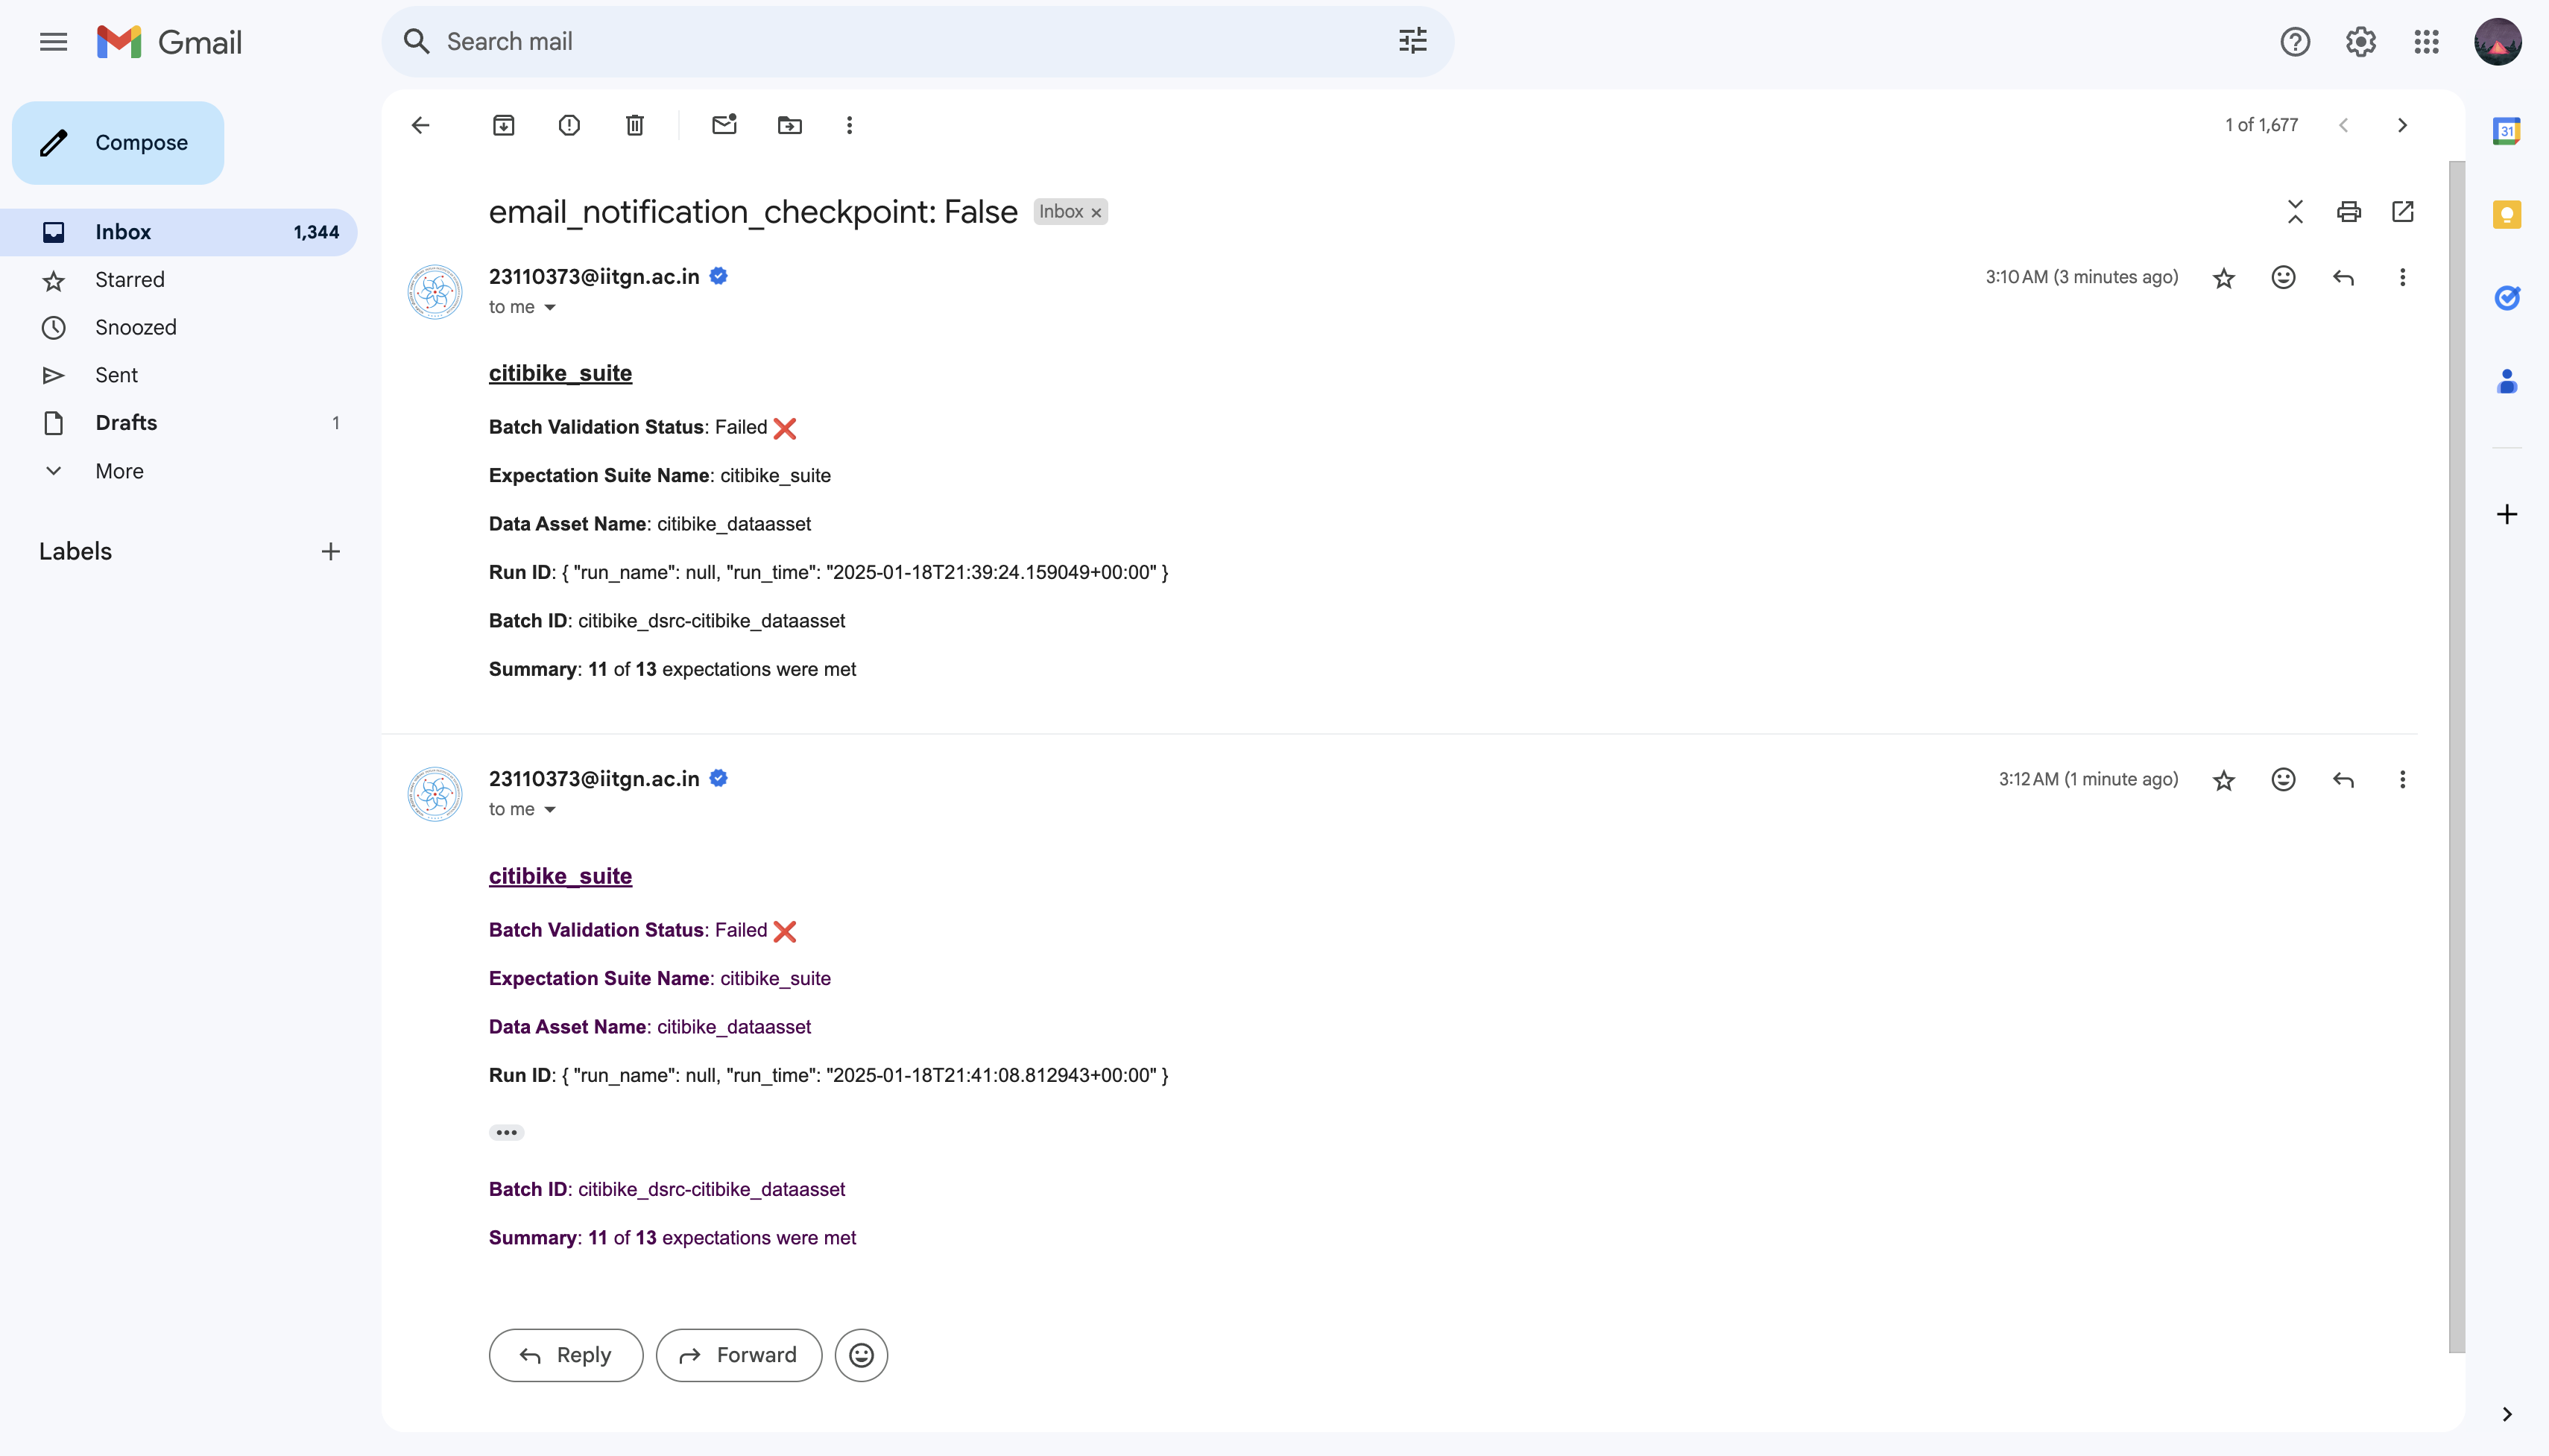

In [ ]:
# pa.Check.eq(value)	Checks if all values are equal to value.	pa.Check.eq(100) (All values must be 100)
# pa.Check.ne(value)	Checks if all values are not equal to value.	pa.Check.ne(0) (No values can be 0)
# pa.Check.isin([val1, val2])	Checks if values are within a given list.	pa.Check.isin(["A", "B", "C"])
# pa.Check.notin([val1, val2])	Checks if values are not in a given list.	pa.Check.notin(["X", "Y"])
# pa.Check.isna()	Ensures values are NaN (null values).	pa.Check.isna()
# pa.Check.notna()	Ensures values are not NaN.	pa.Check.notna()

# pa.Check.gt(value)	Values must be greater than value.	pa.Check.gt(0) (All values must be > 0)
# pa.Check.ge(value)	Values must be greater than or equal to value.	pa.Check.ge(18) (Minimum age 18)
# pa.Check.lt(value)	Values must be less than value.	pa.Check.lt(100) (All values must be < 100)
# pa.Check.le(value)	Values must be less than or equal to value.	pa.Check.le(200) (Max salary 200)
# pa.Check.between(min, max)	Values must be within range [min, max].	pa.Check.between(1, 10)
# pa.Check.neq(0)	Ensures values are not equal to 0.	pa.Check.neq(0)

# Check	Description	Example
# pa.Check.str_length(min_value, max_value)	Ensures string length is within a range.	pa.Check.str_length(3, 10)
# pa.Check.str_matches(r"regex_pattern")	Ensures values match a regex pattern.	pa.Check.str_matches(r"\d{4}-\d{2}-\d{2}") (YYYY-MM-DD format)
# pa.Check.str_contains("keyword")	Ensures string contains a specific word.	pa.Check.str_contains("bike")
# pa.Check.str_startswith("prefix")	Ensures string starts with a prefix.	pa.Check.str_startswith("ID_")
# pa.Check.str_endswith("suffix")	Ensures string ends with a suffix.	pa.Check.str_endswith(".csv")

In [ ]:
# def cohen_kappa(ratings1, ratings2):
#     """
#     Calculates Cohen's Kappa statistic for agreement between two raters.

#     Args:
#         ratings1 (list): List of ratings from the first rater.
#         ratings2 (list): List of ratings from the second rater.

#     Returns:
#         float: Cohen's Kappa value.
#     """

#     n = len(ratings1)

#     # Calculate observed agreement
#     agreement = sum(r1 == r2 for r1, r2 in zip(ratings1, ratings2)) / n

#     # Calculate expected agreement by chance
#     unique_ratings = set(ratings1 + ratings2)

#     p_i = [sum(r == rating for r in ratings1) / n for rating in unique_ratings]
#     p_j = [sum(r == rating for r in ratings2) / n for rating in unique_ratings]

#     expected_agreement = sum(p_i[i] * p_j[i] for i in range(len(unique_ratings)))

#     # Calculate Kappa
#     kappa = (agreement - expected_agreement) / (1 - expected_agreement)

#     return kappa

# def fleiss_kappa(ratings):
#     """
#     Calculates Fleiss' Kappa statistic for agreement among multiple raters.

#     Args:
#         ratings (list): A list of lists where each inner list contains the ratings from one rater for each item.

#     Returns:
#         float: Fleiss' Kappa value.
#     """

#     num_raters = len(ratings[0])
#     num_items = len(ratings)

#     # Calculate observed agreement
#     total_agreement = sum(sum(1 for r1, r2 in zip(row, ratings[i]) if r1 == r2) for i in range(num_items) for row in ratings)

#     # Calculate expected agreement by chance
#     item_counts = [sum(r == rating for r in row) for rating in zip(*ratings)]
#     expected_agreement = sum(sum(count * (count - 1) for count in item_counts) / (num_raters * (num_raters - 1)))

#     # Calculate Kappa
#     kappa = (total_agreement / (num_items * num_raters * (num_raters - 1))) - (expected_agreement / (num_items * (num_raters - 1)))

#     return kappa
